<center>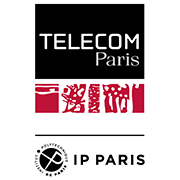</center>

<h1><center><strong><font color="green">IA 717: CHAI & justice: linguistics of AI ethics charters & manifestos</font></strong></center></h1>
<h3><center><font color="blue"><strong>Student Version</strong></font></center></h3>

<center>
<h3> Project Supervisor <br/> <a>Maria Boritchev</a></h3>
<email>maria.boritchev@telecom-paris.fr</email>
<br/>

Year 2025-2026
</center>

------------------------

# <font color="green">**Context and objectives**</font>

> The recent years have seen a surge of initiatives with the goal of defining what “ethical” artificial intelligence would or should entail, resulting in the publication of various charters and manifestos discussing AI ethics; these documents originate from academia, AI industry companies, non-profits, regulatory institutions, and the civil society. The contents of such documents vary wildly, from short, vague position statements to verbatims of democratic debates or impact assessment studies. As such, they are a marker of the social world of artificial intelligence, outlining the tenets of different actors, the consensus and dissensus on important goals, and so on. <a href="https://mapaie.telecom-paris.fr/mapaie-paper.pdf">Mapping AI Ethics: a meso-scale analysis of its charters and manifestos, M. Gornet et al, 2024.</a>

The objective of this project to study the linguistic specificities of a corpus of charters and manifestos of AI ethics, called ```MapAIE```. We will study the semantic structure of sentences from MapAIE using the Abstract Meaning Representation (<a href="https://github.com/amrisi/amr-guidelines/blob/master/amr.md">AMR</a>) abstraction method. In particular, we will focus on the usage and the environment of the term _justice_, in order to see its context and the (possibly different?) meanings associated with its usage.

This project is organised in three subtasks:
1) Data retrieval and exploration.
2) Exploration of the term _justice_ in the data.
3) AMR graphs exploration & exploration of the term _justice_ in AMR graphs.


### <font color="green">Evaluation</font>

The project is evaluated through a presentation with a report and your completed project, documented with a README. Grades will be partly individual and partly collective. 

# <font color="green">**1 - Data Presentation and Retrieval**</font>

Our main corpus is called _MapAIE - Mapping AI Ethics_. It is a collection of 436 common charters and manifestos around artificial intelligence and AI ethics. The corpus' <a href="https://mapaie.telecom-paris.fr/mapaie-datasheet.pdf">datasheet</a> provides detailed information about the collection process and the contents of the corpus. 

<font color="red">1.1 Question:</font> Using the git repository https://gitlab.telecom-paris.fr/tiphaine.viard/mapaie, build the data locally. How many documents are there in the ```./pdf``` folder? in the ```./txt``` folder?

In [1]:
import os
import csv

doc_folder = "data/docs"
text_folder = "data/txts"

files = [f for f in os.listdir(doc_folder) if os.path.isfile(os.path.join(doc_folder, f))]
text_files = [f for f in os.listdir(text_folder) if os.path.isfile(os.path.join(text_folder, f))]

pdf_html_documents = [os.path.splitext(file)[0] for file in files]
text_documents = [os.path.splitext(file)[0] for file in text_files]


should_be_included = []
is_included = False


with open('data/all_manifestos.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for i, row in enumerate(reader):
        is_included = any(cell.lower() == "included" for cell in row)
        if is_included:
            #print(i-1)
            #print(row)
            should_be_included.append(str(i-1))
                


num_pdf = len(pdf_html_documents)
num_txt = len(text_documents)
num_included = len(should_be_included)

print(f"Nombre de fichiers PDF : {num_pdf}")
print(f"Nombre de fichiers TXT : {num_txt}")
print(f"Nombre total de fichiers devant être inclus : {num_included}")

missing_in_text = set(should_be_included) - set(text_documents)
missing_in_pdf_html = set(should_be_included) - set(pdf_html_documents)

print(f"Nombre de fichiers manquants dans TXT : {len(missing_in_text)}")
print(f"Nombre de fichiers manquants dans PDF/HTML : {len(missing_in_pdf_html)}")

if missing_in_text:
    print(f"Exemples fichiers manquants dans TXT : {list(missing_in_text)[:20]}")

if missing_in_pdf_html:
    print(f"Exemples fichiers manquants dans PDF/HTML : {list(missing_in_pdf_html)[:20]}")


Nombre de fichiers PDF : 801
Nombre de fichiers TXT : 650
Nombre total de fichiers devant être inclus : 437
Nombre de fichiers manquants dans TXT : 43
Nombre de fichiers manquants dans PDF/HTML : 43
Exemples fichiers manquants dans TXT : ['587', '555', '661', '517', '383', '115', '481', '667', '389', '547', '451', '260', '706', '537', '508', '464', '506', '648', '388', '573']
Exemples fichiers manquants dans PDF/HTML : ['587', '555', '661', '517', '383', '115', '481', '667', '389', '547', '451', '260', '706', '537', '508', '464', '506', '648', '388', '573']


<font color="yellow">1.1 Answer:</font>

If the answer in the previous question is different from 436, reduce the local data by keeping only the documents that should be included in the corpus. These documents are identified in the file `all_manifestos.csv`, these are the documents which state `Included`in the column `Status`. 

Let's explore the data. As you can see, documents in ```./pdf``` folder and documents in the ```./txt``` folder are the same, and the name formatting is such that ```n.txt``` contains plain text extracted from ```n.pdf```.

<font color="red">1.2 Question:</font> Why is it useful to have the data both in .pdf and .txt format? Cite one advantage and one drawback for linguistic analysis for each of the formats.

<font color="orange">1.2 Answer:</font> 

Having the data in PDF format preserves the original layout but is harder to analyze automatically, while TXT files are easy to process with language tools but lose the original formatting.

We now want to know more about words and key-words used throughout the corpus. There are several terms that are widely used when writing about ethics of AI, and it is interesting from a linguistic point of view to see where and how these words occur. 

<font color="red">1.3 Question:</font> what are the most frequent words, excluding stopwords, in the whole corpus? Please provide visualizations and comment these visualisations.

In [ ]:
import os
import string
from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

import pdfplumber
from bs4 import BeautifulSoup

nltk.download('punkt')
nltk.download('stopwords')

# ----- mixed file list -----
file_list = files + text_files

# ----- Step 1: Extract text -----
def extract_text(file_path):
    text = ""
    
    if file_path.lower().endswith('.pdf'):
        try:
            with pdfplumber.open('data/docs/' + file_path) as pdf:
                for page in pdf.pages:
                    page_text = page.extract_text()
                    if page_text:
                        text += page_text + " "
        except Exception as e:
            print(f"Warning: Could not read PDF {file_path}: {e}")

    elif file_path.lower().endswith('.html'):        
            encodings_to_try = ['utf-8', 'windows-1252', 'iso-8859-1']
            success = False
            for enc in encodings_to_try:
                try:
                    with open('data/docs/' + file_path, 'r', encoding=enc) as f:
                        soup = BeautifulSoup(f, 'html.parser')
                        text += soup.get_text(separator=' ') + " "
                    success = True
                    break
                except UnicodeDecodeError:
                    continue

            # Try auto-detection if all known encodings fail
            if not success:
                with open('data/docs' + file_path, 'rb') as f:
                    raw = f.read()
                    detected = chardet.detect(raw)
                    encoding = detected.get('encoding', 'utf-8')
                    try:
                        text += BeautifulSoup(raw.decode(encoding, errors='ignore'), 'html.parser').get_text(separator=' ')
                    except Exception as e:
                        print(f"⚠️ Could not decode {file_path} even after detection: {e}")


    elif file_path.lower().endswith('.txt'):
        try:
            with open('data/txts/' + file_path, 'r', encoding='utf-8') as f:
                text += f.read() + " "
        except Exception as e:
            print(f"Warning: Could not read TXT {file_path}: {e}")

    else:
        print(f"Skipping unsupported file type: {file_path}")
    return text

# Combine text from all files
all_text = ""
for file_path in file_list:
    all_text += extract_text(file_path)

# ----- Step 2: Preprocess text -----
# Lowercase
all_text = all_text.lower()
# Remove punctuation
all_text = all_text.translate(str.maketrans('', '', string.punctuation))
# Tokenize
words = word_tokenize(all_text)
# Remove stopwords
stop_words = set(stopwords.words('english') + stopwords.words('french') + ['null', 'obj', 'endobj'])
filtered_words = [word for word in words if word.isalpha() and word not in stop_words and len(word) > 1]

# ----- Step 3: Count word frequencies -----
word_counts = Counter(filtered_words)
top_words = word_counts.most_common(20)

# ----- Step 4: Visualizations -----
# Bar chart
words_bar, counts_bar = zip(*top_words)
plt.figure(figsize=(12,6))
plt.bar(words_bar, counts_bar, color='skyblue')
plt.title("Top 20 Most Frequent Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/durantoine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/durantoine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Could get FontBBox from font descriptor because None cannot be parsed as 4 floats
Could get FontBBox from font descriptor because None cannot be parsed as 4 floats
Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray non-stroke color because /'P11' is an invalid float value
Cannot set gray non-stroke color because /'P59' is an invalid float value
Cannot set gray non-stroke color because /'P61' is an invalid float value
Cannot set gray non-stroke color because /'P62' is an invalid float value
Cannot set gray non-stroke color because /'P64' is an invalid float value
Cannot set gray non-stroke color because /'P65' is an invalid float value
Cannot set gray non-stroke color because /'P66' is an invalid float value
Cannot set gray non-stroke color because /'P67' is an invalid float value
Cannot set gray non-stroke color because /'P68' is an invalid float value
Cannot set gray non-stroke color because /'P69' is an invalid float value
Cannot set gray non-stroke 

KeyboardInterrupt: 

<font color="orange">1.3 Answer:</font> 

# <font color="green">**2 - Exploration of the term _justice_ in the data**</font>


<font color="red">2.1 Question:</font> Draw a visualisation of the amount of times the term _justice_ is used in a document compared with the total amount of words in a document. Comment this viualisation: what can we observe? What hypothesis can we draw from this observation?

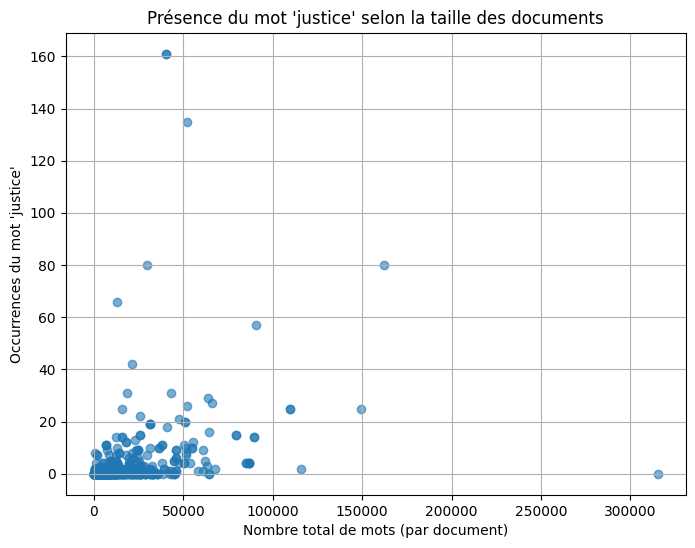

In [ ]:
# To-do
import os
import pandas as pd
import matplotlib.pyplot as plt

TXTS_DIR = "./data/txts"

data = []
for f in os.listdir(TXTS_DIR):
    if f.lower().endswith(".txt"):
        path = os.path.join(TXTS_DIR, f)
        with open(path, "r", encoding="utf-8", errors="ignore") as file:
            text = file.read().lower().split()
            total_words = len(text)
            justice_count = text.count("justice")
            data.append((f, justice_count, total_words, justice_count/total_words if total_words else 0))

df = pd.DataFrame(data, columns=["document", "justice_count", "total_words", "ratio"])

# Visualisation scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df["total_words"], df["justice_count"], alpha=0.6)
plt.xlabel("Nombre total de mots (par document)")
plt.ylabel("Occurrences du mot 'justice'")
plt.title("Présence du mot 'justice' selon la taille des documents")
plt.grid(True)
plt.show()

<font color="orange">2.1 Answer:</font> 

La grande majorité des points est très proches de l’axe horizontal (en dessous de 50 occurences) cela signifie que la plupart des documents contiennent très peu (voire zéro) occurrences de “justice”, même quand leur taille est conséquente.

On observe la présence de quelques valeurs extrêmes (outliers) représentant des documents (points isolés en haut du graphe) qui contiennent beaucoup plus d’occurrences (jusqu’à plus de 200).

On ne voit pas de relation proportionnelle entre la taille du document et la fréquence absolue de justice. Parfois, des documents longs ne contiennent presque pas le terme, et inversement des documents relativement courts l’utilisent plusieurs dizaines de fois.

<font color="red">2.2 Question:</font> which are the documents in which the term _justice_ appears the most (top 10% of the corpus)? Please provide a visualization and comment it.

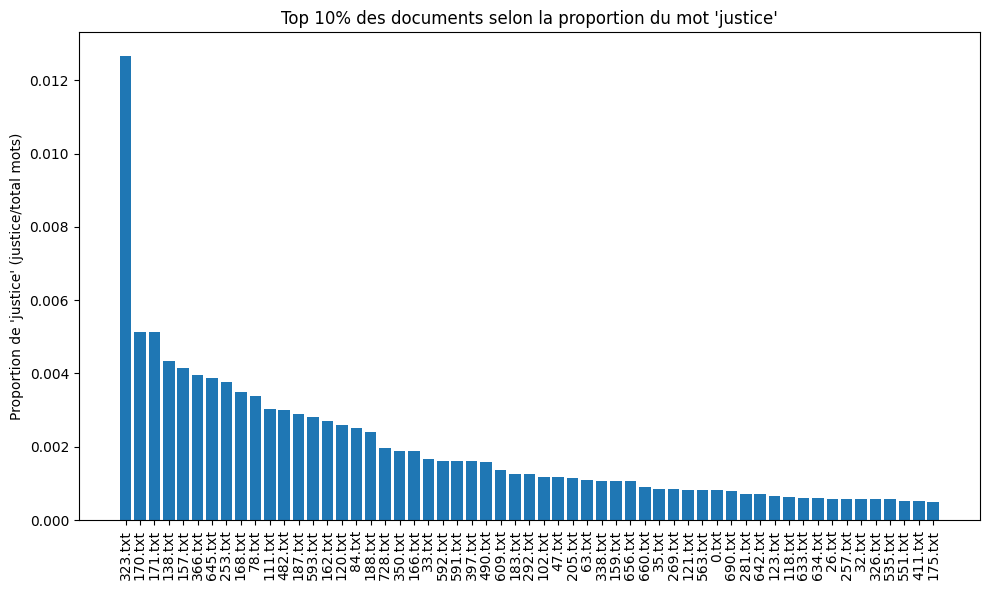

,document,justice_count,total_words,ratio
429,323.txt,8,631,0.012678
203,170.txt,66,12852,0.005135
192,171.txt,66,12852,0.005135
111,138.txt,2,462,0.004329
281,157.txt,2,482,0.004149
200,366.txt,161,40533,0.003972
482,645.txt,2,517,0.003868
569,253.txt,7,1857,0.003770
318,168.txt,267,76329,0.003498
359,78.txt,2,589,0.003396


In [ ]:
# To-do
import os
import pandas as pd
import matplotlib.pyplot as plt

TXTS_DIR = "./data/txts"

data = []
for f in os.listdir(TXTS_DIR): #os.listdir(path) sert à lister le contenu d’un dossier
    if f.lower().endswith(".txt"): #vérifie que le fichier se termine bien par .txt
        path = os.path.join(TXTS_DIR, f) #os.path.join(path1, path2) sert à joindre deux chemins de dossiers
        with open(path, "r", encoding="utf-8", errors="ignore") as file: 
            text = file.read().lower().split()
            total_words = len(text)
            justice_count = text.count("justice")
            ratio = justice_count/total_words if total_words else 0
            data.append((f, justice_count, total_words, ratio))

df = pd.DataFrame(data, columns=["document", "justice_count", "total_words", "ratio"])

# Trier par ratio décroissant
df_sorted = df.sort_values("ratio", ascending=False)

# Calculer le top 10%
top_10pct = int(len(df_sorted) * 0.1)
df_top = df_sorted.head(top_10pct)

# Visualisation
plt.figure(figsize=(10,6))
plt.bar(df_top["document"], df_top["ratio"])
plt.xticks(rotation=90)
plt.ylabel("Proportion de 'justice' (justice/total mots)")
plt.title("Top 10% des documents selon la proportion du mot 'justice'")
plt.tight_layout()
plt.show()


n = max(1, int(len(df_sorted) * 0.1))  # évite d'avoir 0 si corpus < 10
df_top = df_sorted.head(n)

df_top


323.txt : seulement 8 occurrences, mais sur un texte très court (631 mots), donc le ratio est le plus élevé (~1,27%).

170.txt & 171.txt : 66 occurrences chacun sur à peu près 12 852 mots --> ratio plus faible (~0,5%).

138.txt et 157.txt : très petits textes (462 et 482 mots), avec seulement 2 occurrences --> cela leur donne un ratio relativement élevé (~0,4%).

366.txt : beaucoup plus long (40 533 mots), 161 occurrences --> en valeur absolue c’est un des plus “chargés” en justice, mais son ratio est plus bas (~0,39%).

168.txt : énorme document (76 329 mots), 267 occurrences --> gros volume absolu, mais ratio plus faible (~0,35%).

<font color="orange">2.2 Answer:</font> 

Now, we want to know more about the context in which the term _justice_ appears in the corpus. 

<font color="red">2.3 Question:</font> Explore the context in which the term _justice_ appears in the documents selected in the previous question (top 10% of the corpus). Please provide a visualisation and comment it.

Hint: you could for example consider n-grams containing _justice_ (but feel free to explore context by other means!)

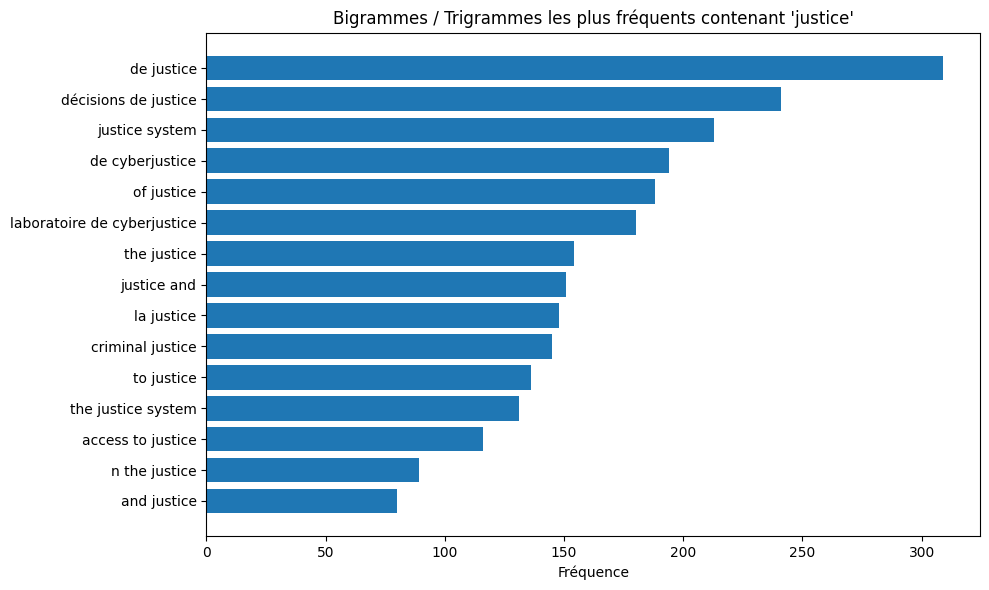

In [ ]:
import os
import re
from collections import Counter
import matplotlib.pyplot as plt

TXTS_DIR = "./data/txts"

def extract_ngrams(words, n=2):
    """Construit tous les n-grammes d'une liste de mots"""
    return [" ".join(words[i:i+n]) for i in range(len(words)-n+1)]

ngrams_counter = Counter()

# Parcourir les fichiers du top 10%
for fname in df_top["document"]:
    path = os.path.join(TXTS_DIR, fname)
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        text = f.read().lower()
        words = re.findall(r"\w+", text)

        # bigrammes et trigrammes
        bigrams = extract_ngrams(words, 2)
        trigrams = extract_ngrams(words, 3)

        # garder uniquement ceux qui contiennent "justice"
        for bg in bigrams:
            if "justice" in bg:
                ngrams_counter[bg] += 1
        for tg in trigrams:
            if "justice" in tg:
                ngrams_counter[tg] += 1

# Sélection des 15 n-grams les plus fréquents
top_ngrams = ngrams_counter.most_common(15)

# Visualisation en bar chart
labels, values = zip(*top_ngrams)
plt.figure(figsize=(10,6))
plt.barh(labels, values)
plt.title("Bigrammes / Trigrammes les plus fréquents contenant 'justice'")
plt.xlabel("Fréquence")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#RAJOUTER FILTRAGE LANGUE ------------------------------------------------------


<font color="orange">2.3 Answer:</font> 

We will now focus on a sentence-level analysis of our corpus and extract a sub-corpus of sentences that use the word _justice_.

<font color="red">2.4 Question:</font> What information will we lose by focusing on extracted sentences? Please provide three answers.

<font color="orange">2.4 Answer:</font> 

We will definitely loose information, but focusing on a sentence-level analysis gives us access to finer-grained means of linguistic analysis. 

<font color="red">2.5 Question:</font> Extract the _justice-MapAIE_ corpus: a corpus of sentences of MapAIE containing the term _justice_. Organise the data in such a way that, for each sentence, we have:
- the textual content of the sentence;
- the identifier (number) of the document this sentence is extracted from.
How many sentences does the _justice-MapAIE_ corpus contain?

In [ ]:
# To-do

# Liste de toutes les phrases contenant "justice" --> envoyer email quand c'est fait

<font color="orange">2.5 Answer:</font> 

## <font color="red">/!\ To do to get data for the rest of the project /!\ </font> 

### Make sure justice-MapAIE is properly extracted and available in the project's git repository. Then, send an email to maria.boritchev@telecom-paris.fr to inform me of the availability of justice-MapAIE so that I can produce data you need for part 3.

We continue by investigating the syntax of sentences. The baseline approach we will use for this part is part-of-speech (POS) tagging: by tagging the elements of sentences by POS, we can investigate the main syntactic roles taken by the term _justice_.

<font color="red">2.6 Question:</font> What are the syntactic roles taken by the term _justice_ in the _justice-MapAIE_ corpus? Please provide a visualization and comment it.

In [ ]:
# To-do

<font color="orange">2.6 Answer:</font> 

# <font color="green">**3 - AMR graphs exploration**</font>


We now investigate the semantics of sentences using Abstract Meaning Representation. Abstract Meaning Representation (AMR, <a href="https://aclanthology.org/W13-2322.pdf">Banarescu et al, 2013</a>)  provides a framework to model the meaning of a sentence, notably actions, events or states and their participants. AMR relies heavily on (verbal) concepts defined in <a href="https://propbank.github.io/">PropBank</a> . The figure below shows an AMR representation for the sentence "Barack Obama was born in 1961". In this figure, ```bear-02``` stands for PropBank's second sense for the verb ''to bear''. Instances are indicated by a following ```/```, for example  ```p``` is an instance of the concept  ```person ```. The names of the variables do not have any particular meaning, they have to be distinct. Relations are indicated by an initial colon (ex:  ```:ARG1```,  ```:time```). Literals (strings and numbers) lack a preceding instance and  ```/``` (ex:  ``` ``Obama'' ``` and  ```1961```. More info on AMR syntax can be found here: https://github.com/amrisi/amr-guidelines/blob/master/amr.md
.

<center>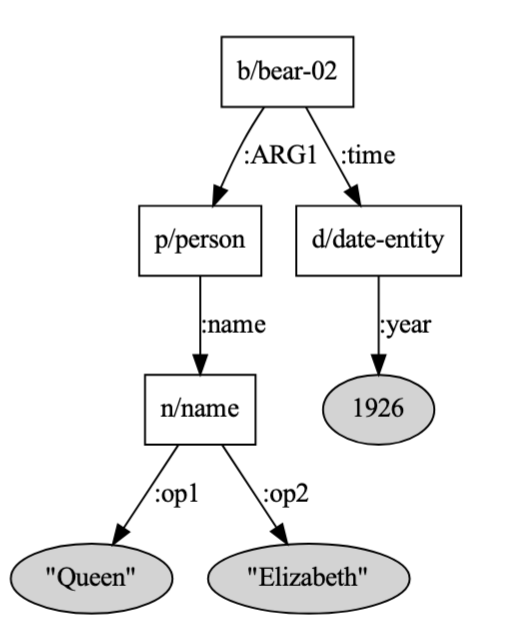</center>

The same graph can be represented in a serialised format called PENMAN format: 
```
(b / bear-02
    :ARG1 (p / person
        :name (n / name
            :op1 "Queen"
            :op2 "Elizabeth"))
    :time (d / date-entity
        :year 1926))
```

AMR graphs for justice-MapAIE are provided in the file `justice-MapAIE_penmans.amr`. It is text file containing, for each sentence:
- a line `::snt`, providing the original sentence in English;
- a line with the file number;
- the AMR graph in PENMAN format.

<font color="red">3.1 Question:</font> Explore the PropBank concepts used in the AMR graphs provided in `key_penmans.amr`. What concepts are used to represent the term _justice_? Which one of these concepts are actually part of PropBank (provide the link to the concept's frame for these)? Which ones are not part of PropBank? Where do these concept come from? 

In [ ]:
# To-do

<font color="orange">3.1 Answer:</font> 

AMR graphs give access to an abstraction of the semantic structure of the original sentences. Here, we are interested in the term _justice_, its semantic relations, and its semantic role in different contexts. In terms of AMR structure, we want to analyze the following elements:
- the position of the term _justice_ in the AMR graph (root/node/leaf);
- the parents (superior concepts) of the term _justice_;
- the siblings (concepts with the same parent) of the term _justice_;
- the children (inferior concepts) of the term _justice_;
- the relationships linking _justice_ to its parents and its children.

<font color="red">3.2 Question:</font> Explore the structure of the AMR graphs provided in `key_penmans.amr`. Please provide visualisations and comments for each of the explored elements.

In [ ]:
# To-do

<font color="orange">3.2 Answer:</font> 

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/durantoine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/durantoine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Could get FontBBox from font descriptor because None cannot be parsed as 4 floats
Could get FontBBox from font descriptor because None cannot be parsed as 4 floats
Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray non-stroke color because /'P11' is an invalid float value
Cannot set gray non-stroke color because /'P59' is an invalid float value
Cannot set gray non-stroke color because /'P61' is an invalid float value
Cannot set gray non-stroke color because /'P62' is an invalid float value
Cannot set gray non-stroke color because /'P64' is an invalid float value
Cannot set gray non-stroke color because /'P65' is an invalid float value
Cannot set gray non-stroke color because /'P66' is an invalid float value
Cannot set gray non-stroke color because /'P67' is an invalid float value
Cannot set gray non-stroke color because /'P68' is an invalid float value
Cannot set gray non-stroke color because /'P69' is an invalid float value
Cannot set gray non-stroke 

Skipping unsupported file type: .DS_Store


Cannot set gray non-stroke color because /'P217' is an invalid float value
Cannot set gray non-stroke color because /'P221' is an invalid float value
Cannot set gray non-stroke color because /'P225' is an invalid float value
Cannot set gray non-stroke color because /'P229' is an invalid float value
Cannot set gray non-stroke color because /'P233' is an invalid float value
Cannot set gray non-stroke color because /'P237' is an invalid float value
Cannot set gray non-stroke color because /'P380' is an invalid float value
Cannot set gray non-stroke color because /'P685' is an invalid float value
Cannot set gray non-stroke color because /'P691' is an invalid float value
Cannot set gray non-stroke color because /'P697' is an invalid float value
Cannot set gray non-stroke color because /'P703' is an invalid float value
Cannot set gray non-stroke color because /'P709' is an invalid float value
Cannot set gray non-stroke color because /'P715' is an invalid float value
Cannot set gray non-strok

Cannot set gray non-stroke color because /'P3' is an invalid float value
Cannot set gray non-stroke color because /'P4' is an invalid float value
Cannot set gray non-stroke color because /'P5' is an invalid float value
Cannot set gray non-stroke color because /'P6' is an invalid float value
Cannot set gray non-stroke color because /'P7' is an invalid float value
Cannot set gray non-stroke color because /'P8' is an invalid float value
Cannot set gray non-stroke color because /'P9' is an invalid float value
Cannot set gray non-stroke color because /'P298' is an invalid float value
Cannot set gray non-stroke color because /'P301' is an invalid float value
Cannot set gray non-stroke color because /'P312' is an invalid float value
Cannot set gray non-stroke color because /'P323' is an invalid float value


Could get FontBBox from font descriptor because None cannot be parsed as 4 floats


Cannot set gray non-stroke color because /'P226' is an invalid float value
Cannot set gray non-stroke color because /'P228' is an invalid float value
Cannot set gray non-stroke color because /'P231' is an invalid float value
Cannot set gray non-stroke color because /'P226' is an invalid float value
Cannot set gray non-stroke color because /'P228' is an invalid float value
Cannot set gray non-stroke color because /'P231' is an invalid float value


Cannot set gray non-stroke color because /'P1' is an invalid float value
Cannot set gray non-stroke color because /'P2' is an invalid float value
Could get FontBBox from font descriptor because None cannot be parsed as 4 floats
Could get FontBBox from font descriptor because None cannot be parsed as 4 floats


Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray stroke color because /'P1' is an invalid float value
Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray stroke color because /'P1' is an invalid float value


Cannot set gray stroke color because /'P0' is an invalid float value


Cannot set gray stroke color because /'P0' is an invalid float value


Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray non-stroke color because /'P221' is an invalid float value
Cannot set gray non-stroke color because /'P231' is an invalid float value
Cannot set gray non-stroke color because /'P239' is an invalid float value
Cannot set gray non-stroke color because /'P249' is an invalid float value
Cannot set gray non-stroke color because /'P259' is an invalid float value
Could get FontBBox from font descriptor because None cannot be parsed as 4 floats
Could get FontBBox from font descriptor because None cannot be parsed as 4 floats
Cannot set gray non-stroke color because /'P0' is an invalid float value
Cannot set gray non-stroke color because /'P1' is an invalid float value
Cannot set gray non-stroke color because /'P0' is an invalid float value
Cannot set gray non-stroke color because /'P1' is an invalid float value
Cannot set gray non-stroke color because /'P2' is an invalid float value
Cannot set gray non-stroke 

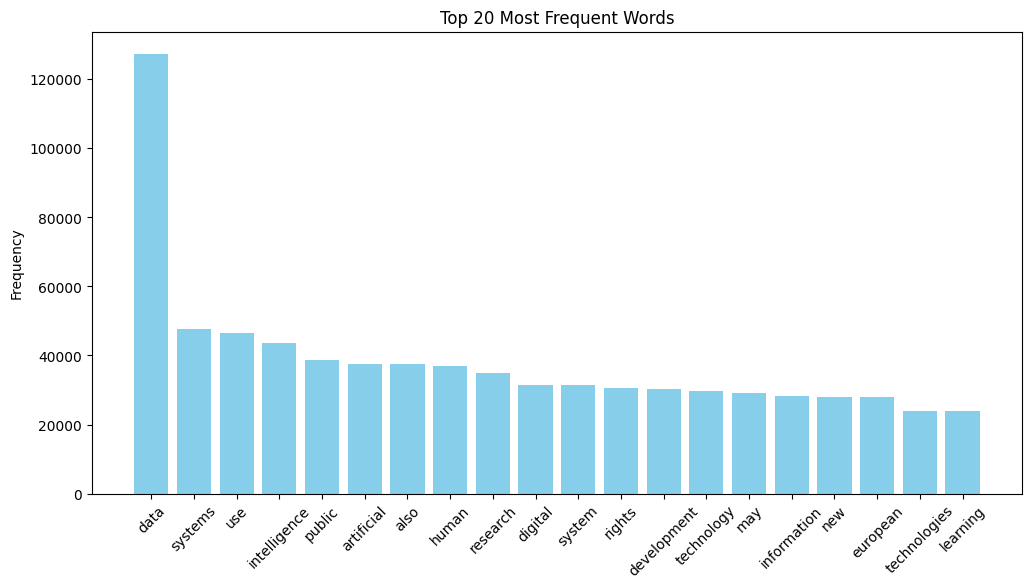

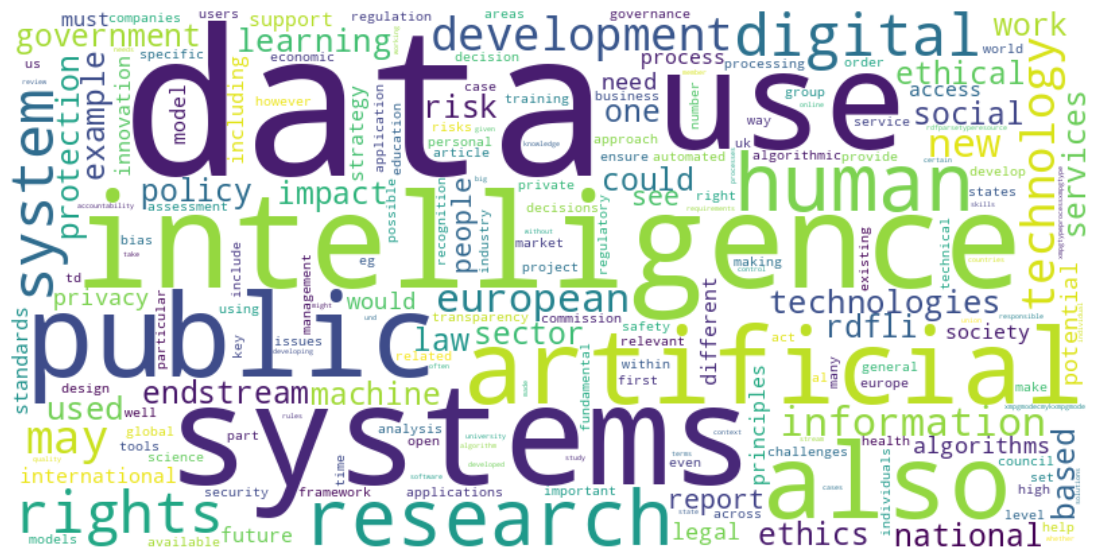

In [6]:
import re 

phrases_justice = []

for file in file_list:
    current_text = extract_text(file)
    sentences = re.split(r'(?<=[.!?])\s+', current_text)
    justice_sentences = [s for s in sentences if re.search(r'\bjustice\b', s, re.IGNORECASE) or re.search(r'\bJustice\b', s, re.IGNORECASE)]

    for sent in justice_sentences:
        sent_with_doc_id = sent + ' (extracted from' + str(file) + ')'
        phrases_justice.append(sent_with_doc_id)

Could get FontBBox from font descriptor because None cannot be parsed as 4 floats
Could get FontBBox from font descriptor because None cannot be parsed as 4 floats
Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray non-stroke color because /'P11' is an invalid float value
Cannot set gray non-stroke color because /'P59' is an invalid float value
Cannot set gray non-stroke color because /'P61' is an invalid float value
Cannot set gray non-stroke color because /'P62' is an invalid float value
Cannot set gray non-stroke color because /'P64' is an invalid float value
Cannot set gray non-stroke color because /'P65' is an invalid float value
Cannot set gray non-stroke color because /'P66' is an invalid float value
Cannot set gray non-stroke color because /'P67' is an invalid float value
Cannot set gray non-stroke color because /'P68' is an invalid float value
Cannot set gray non-stroke color because /'P69' is an invalid float value
Cannot set gray non-stroke 

Skipping unsupported file type: .DS_Store


Cannot set gray non-stroke color because /'P217' is an invalid float value
Cannot set gray non-stroke color because /'P221' is an invalid float value
Cannot set gray non-stroke color because /'P225' is an invalid float value
Cannot set gray non-stroke color because /'P229' is an invalid float value
Cannot set gray non-stroke color because /'P233' is an invalid float value
Cannot set gray non-stroke color because /'P237' is an invalid float value
Cannot set gray non-stroke color because /'P380' is an invalid float value
Cannot set gray non-stroke color because /'P685' is an invalid float value
Cannot set gray non-stroke color because /'P691' is an invalid float value
Cannot set gray non-stroke color because /'P697' is an invalid float value
Cannot set gray non-stroke color because /'P703' is an invalid float value
Cannot set gray non-stroke color because /'P709' is an invalid float value
Cannot set gray non-stroke color because /'P715' is an invalid float value
Cannot set gray non-strok

Cannot set gray non-stroke color because /'P298' is an invalid float value
Cannot set gray non-stroke color because /'P301' is an invalid float value
Cannot set gray non-stroke color because /'P312' is an invalid float value
Cannot set gray non-stroke color because /'P323' is an invalid float value


Could get FontBBox from font descriptor because None cannot be parsed as 4 floats


Cannot set gray non-stroke color because /'P226' is an invalid float value
Cannot set gray non-stroke color because /'P228' is an invalid float value
Cannot set gray non-stroke color because /'P231' is an invalid float value
Cannot set gray non-stroke color because /'P226' is an invalid float value
Cannot set gray non-stroke color because /'P228' is an invalid float value
Cannot set gray non-stroke color because /'P231' is an invalid float value


Cannot set gray non-stroke color because /'P1' is an invalid float value
Cannot set gray non-stroke color because /'P2' is an invalid float value
Could get FontBBox from font descriptor because None cannot be parsed as 4 floats
Could get FontBBox from font descriptor because None cannot be parsed as 4 floats


Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray stroke color because /'P1' is an invalid float value
Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray stroke color because /'P1' is an invalid float value


Cannot set gray stroke color because /'P0' is an invalid float value


Cannot set gray stroke color because /'P0' is an invalid float value


Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray non-stroke color because /'P221' is an invalid float value
Cannot set gray non-stroke color because /'P231' is an invalid float value
Cannot set gray non-stroke color because /'P239' is an invalid float value
Cannot set gray non-stroke color because /'P249' is an invalid float value
Cannot set gray non-stroke color because /'P259' is an invalid float value
Could get FontBBox from font descriptor because None cannot be parsed as 4 floats
Could get FontBBox from font descriptor because None cannot be parsed as 4 floats
Cannot set gray non-stroke color because /'P0' is an invalid float value
Cannot set gray non-stroke color because /'P1' is an invalid float value
Cannot set gray non-stroke color because /'P0' is an invalid float value
Cannot set gray non-stroke color because /'P1' is an invalid float value
Cannot set gray non-stroke color because /'P2' is an invalid float value
Cannot set gray non-stroke 

In [ ]:
import re

with open("justice_sentences.txt", "w", encoding="utf-8") as f:
    for phrase in phrases_justice:
        cleaned = re.sub(r'\s+', ' ', phrase)  # remplace tout espace/blanc par un simple espace
        cleaned = cleaned.replace("\u2011", "-").strip()
        f.write(cleaned + "\n")